# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [182]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [352]:
def find_sum(a,d,N):
    ## Your code here
    if d <= 0 or N <= 0 :
        return 0
    return sum(list(range(a, d*(N-1) + a + 1,d)))


Check yourself

In [353]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [354]:
def check_prime(N):
    ## Your code here
    
    # variant 1
    return sp.isprime(N)
    
    # variant 2
    #i = 2
    #while i <= N ** 0.5:
    #    if N % i == 0:
    #        return False
    #    i += 1
    #return N > 1
    
   

Check yourself

In [355]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [356]:
def find_primes(N):
    ## Your code here
    if N < 2:
        return []
    primes = [2]
    i = 3;
    while len(primes) < N:
        if check_prime(i):
            primes.append(i)
        i += 2
    return primes        

Check yourself

In [357]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [358]:
def find_max(a, b, c):
    ## Your code here
    if a >= b and a >= c:
        return a
    elif b >= a and b >= c:
        return b
    else:
        return c

Check yourself

In [359]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-96, 59, 70)
Checking on (90, -25, 32)
Checking on (64, 0, -54)
Checking on (-3, -41, -17)
Checking on (-44, 82, 40)
Checking on (-7, -30, -52)
Checking on (81, 23, -10)
Checking on (6, -37, 85)
Checking on (15, 23, -36)
Checking on (6, -44, 4)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [360]:
my_array = np.random.dirichlet(np.ones(20),size=1)[0] * 3

Check yourself

In [361]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [362]:
def cal_euclidean(a, b):  
    ## Your code here
    return np.sum((a - b)**2)**0.5


def cal_manhattan(a, b):    
    ## Your code here
    return np.sum(abs(a-b))
    
def cal_cosine(a, b):    
    ## Your code here
    return 1 - np.sum((np.dot(a.transpose(), b)) / ((np.sum(a**2)**0.5) * np.sum(b**2)**0.5))

Check yourself

In [363]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [364]:
def custom_scaler(my_array):
    ## Your code here
    maxx = np.max(my_array)
    minn = np.min(my_array)
    my_array = np.where(my_array > 0, my_array , my_array * -2 / minn)
    my_array = np.where(my_array < 0, my_array , my_array * 2 / maxx)
    return my_array
    # if the result should be int array
    #return np.round(my_array) 
    
    

Check yourself

In [365]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[-16  58 -99  57] ->> [-0.32323232  2.         -2.          1.96551724]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [369]:
my_array = np.random.randint(0,50,(5,6))
selected_column = my_array[:,np.argmax(np.max(my_array, axis=0))]

In [370]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[49 22 29 18 22 33]
 [22 17  3 43  2 18]
 [14 43 33 23 20 28]
 [31  7 32  6 39 45]
 [25 17 48  6 30 17]]
Shape: (5, 6)
Selected column [49 22 14 31 25]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [371]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.35  nan  nan 0.26 0.55 0.33  nan 0.63  nan 0.65]


In [372]:
## Your code here
arr = np.nan_to_num(arr, nan=np.nanmean(arr))
print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.35 0.46 0.46 0.26 0.55 0.33 0.46 0.63 0.46 0.65]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [373]:
def mean_channel(X):
    # Your code here
    return X.mean(axis=(0,1))

In [374]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.41517857, -0.51116071, -0.53794643])

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [375]:
def get_unique_rows(X):
    # Your code here 
    return np.unique(X, axis=0)

In [376]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
get_unique_rows(X)

array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [377]:
dataset = pd.read_csv (r'titanic.csv')
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
   * Are there any missing values? In which columns?
   * How many classes (pclass) were there on Tinanic?
   * What is the percentage of survived passengers? Are the classes balanced?
   * What is the average ticket fare?
   * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

**Are there any missing values? In which columns?**</br>
 **Answer:** Yes, there is missing values in three columns: Age with `19.9%` of missing values, Cabin with `77.1%` of missing values and Embarked with `0.2%` of missing values. The code below proves that:

In [378]:
## Your code here
np.round(dataset.isna().sum()[dataset.isna().sum()>0] / dataset.shape[0],3)

Age         0.199
Cabin       0.771
Embarked    0.002
dtype: float64

**How many classes (pclass) were there on Tinanic?**</br>
 **Answer:** There are three classes: `1` repeated `216` times, `2` repeated `184` times and `3` repeated `491` times. The code below proves that: 

In [379]:
values, counts = np.unique(dataset['Pclass'], return_counts=True) 
(values, counts)

(array([1, 2, 3], dtype=int64), array([216, 184, 491], dtype=int64))

**What is the percentage of survived passengers? Are the classes balanced?**</br>
 **Answer:** The percentage of survived passengers is `38.4%` and the two classes(`1 - survived, 0 - died`) are imbalanced, because the difference in the number of sample count in each class is huge(`342:549`). The code below proves that:


In [380]:
np.round(len(dataset['Survived'][dataset['Survived'] == 1]) / dataset['Survived'].shape[0], 3)

0.384

**What is the average ticket fare?**</br>
 **Answer:** The average of ticket fare is `32.204`. The code below proves that:

In [381]:
np.round(np.mean(dataset['Fare']), 3)

32.204

**What was the most popular port of embarkation?**</br>
 **Answer:** The most popular port of embarkation is `S`, which was repeated `644` times. The code below proves that:

In [382]:
from collections import Counter
c = Counter(dataset['Embarked'])
c.most_common(1)

[('S', 644)]

---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

   * How many are there unique titles?
   * How many are there passengers with every title?
   * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [383]:
## Your code here
import re

def getTitle(name):
    title = re.search(' ([A-Za-z]+)\.', name)
    if title:
        return title.group(1)
    return ""

titles = dataset["Name"].apply(getTitle)
titles

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

**How many are there unique titles?**</br>
**Answer:** There are 17 titles `['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master'
 'Miss' 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir']`

In [384]:
values, counts = np.unique(titles, return_counts=True) 
print(values, len(values))

['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master'
 'Miss' 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir'] 17


**How many are there passengers with every title?**</br>
**Answer:** `['Capt': 1, 'Col': 2, 'Countess': 1, 'Don': 1, 'Dr': 7, 'Jonkheer': 1, 'Lady': 1,
        'Major': 2, 'Master': 40, 'Miss': 182, 'Mlle': 2, 'Mme': 1, 'Mr': 517, 'Mrs': 125, 'Ms': 1, 'Rev': 6,
        'Sir': 1]`

In [385]:
dict(zip(values, counts))

{'Capt': 1,
 'Col': 2,
 'Countess': 1,
 'Don': 1,
 'Dr': 7,
 'Jonkheer': 1,
 'Lady': 1,
 'Major': 2,
 'Master': 40,
 'Miss': 182,
 'Mlle': 2,
 'Mme': 1,
 'Mr': 517,
 'Mrs': 125,
 'Ms': 1,
 'Rev': 6,
 'Sir': 1}

**What is the most popular man's title? And woman's title?**</br>
**Answer:**

In [386]:
def getSex(title):
    return dataset['Sex'][titles[titles == title].index[0]]

In [387]:
# getting the sex of each title using dataset['Sex']
valuesS = pd.Series(values)
titleSex = valuesS.apply(getSex)

# getting the indexes of male titles
maleTitles = np.where(titleSex == 'male')
# getting the indexes of female titles
femaleTitles = np.where(titleSex == 'female')

In [388]:
maleTitlesCounts = counts[maleTitles]
femaleTitlesCounts = counts[femaleTitles]

In [389]:
maleTitleMaxCount = np.max(maleTitlesCounts)
temp = np.where(counts == maleTitleMaxCount)
print('most popular man\'s title')
values[temp], maleTitleMaxCount

most popular man's title


(array(['Mr'], dtype=object), 517)

In [390]:
femaleTitleMaxCount = np.max(femaleTitlesCounts)
temp = np.where(counts == femaleTitleMaxCount)
print('most popular woman\'s title')
values[temp], femaleTitleMaxCount

most popular woman's title


(array(['Miss'], dtype=object), 182)

---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

   * What is the minimal and maximum ages of the passengers? Visualize it on the plot
   * What is the mean age? Visualize it on the plot
   * Make conclusions about what you see on the plot

**What is the minimal and maximum ages of the passengers? Visualize it on the plot**</br>
**Answer:** the minimum age is `0.42` and the maximum age is `80`

In [391]:
maxAge = dataset['Age'].max()
minAge =dataset['Age'].min()
maxAge, minAge

(80.0, 0.42)

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/1891386678.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*maxAge/x, '-', label = 'MaxAge')
C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/1891386678.py:9: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*minAge/x, '--', label = 'MinAge');


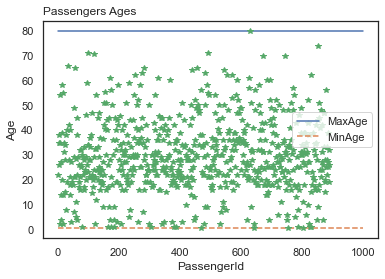

In [392]:
## Your code here
%matplotlib inline
x = np.linspace(0, 1000, 1000)

plt.title("Passengers Ages", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.plot(x, x*maxAge/x, '-', label = 'MaxAge')
plt.plot(x, x*minAge/x, '--', label = 'MinAge');
plt.plot(dataset['PassengerId'], dataset['Age'], '*')
plt.legend()
plt.show()

**What is the mean age? Visualize it on the plot**</br>
**Answer:** The mean age is `29.7`

In [393]:
meanAge = np.round(np.mean(dataset['Age']), 2)
meanAge

29.7

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/1970158937.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*meanAge/x, '-', label = 'MeanAge')


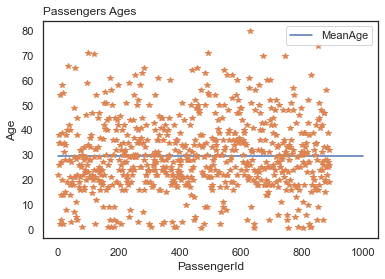

In [394]:
%matplotlib inline
x = np.linspace(0, 1000, 1000)

plt.title("Passengers Ages", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.plot(x, x*meanAge/x, '-', label = 'MeanAge')
plt.plot(dataset['PassengerId'], dataset['Age'], '*')
plt.legend()
plt.show()

**Make conclusions about what you see on the plot**</br>
**Answer:** From the data we have, we can notice some info about the ages of the passengers on the titanic:</br>
  * Older people aged `[70, 80]` are few
  * On the titanic were a lot of childrens and babies
  * Oldest passenger is `80` years old
  * Youngest passenger is `0.42` years old
  * The average age of passengers is `29.7`
  * Most of passengers aged `[15, 50]` years old

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

In [395]:
## You code here
survivorsIndexes = np.where(dataset['Survived'] == 1)
nonsurvivorsIndexes = np.where(dataset['Survived'] == 0)
survivorsAges = dataset['Age'][survivorsIndexes[0]]
nonsurvivorsAges = dataset['Age'][nonsurvivorsIndexes[0]]
meanAgeOfSurvivors = np.round(np.mean(survivorsAges), 2)
meanAgeOfNonsurvivors = np.round(np.mean(nonsurvivorsAges), 2)
meanAgeOfSurvivors, meanAgeOfNonsurvivors

(28.34, 30.63)

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/3781408148.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*meanAgeOfSurvivors/x, '-', label = 'Mean age of survivors')


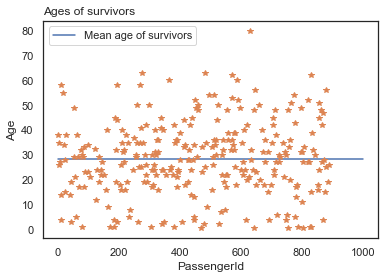

In [396]:
%matplotlib inline

plt.title("Ages of survivors", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.plot(x, x*meanAgeOfSurvivors/x, '-', label = 'Mean age of survivors')
plt.plot(survivorsIndexes[0], survivorsAges , '*')
plt.legend()
plt.show()

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/1459017883.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*meanAgeOfNonsurvivors/x, '-', label = 'Mean age of non-survivors')


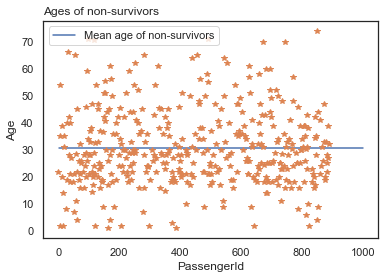

In [397]:
%matplotlib inline

plt.title("Ages of non-survivors", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Age")
plt.plot(x, x*meanAgeOfNonsurvivors/x, '-', label = 'Mean age of non-survivors')
plt.plot(nonsurvivorsIndexes[0], nonsurvivorsAges , '*')
plt.legend()
plt.show()

**Conclusions:**</br>
Yes, the age distribution for survived and not survived passengers are different, and this is what we can observe from those plots:
* There is difference in the number of sample count for each class, where we can notice, that the number of non-survivors much more than the number of survivors.
* There is only one survivor aged between about `[65, 80]`
* There are more infant and child survivors than non-survivors.
* The largest number of non-survivors were between about `15` and `50` years old
* The average age of survivors passengers is `28.34`
* The average age of non-survivors passengers is `30.63`

---
---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



In [398]:
c = Counter(dataset['Embarked'])
c

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [399]:
## You code here
S_embarkation_indexes = np.where(dataset['Embarked']=='S')[0]
S_prices = dataset['Fare'][S_embarkation_indexes]
mean_S_prices = np.round(np.mean(S_prices), 2)
mean_S_prices

27.08

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/3377160072.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_S_prices/x, '-', label = 'Mean prices of tickets from Southampton')


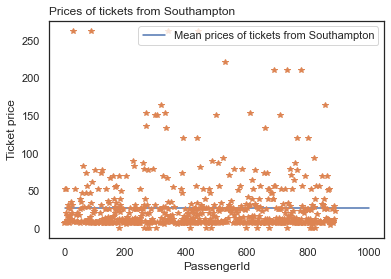

In [400]:
%matplotlib inline

plt.title("Prices of tickets from Southampton", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_S_prices/x, '-', label = 'Mean prices of tickets from Southampton')
plt.plot(S_embarkation_indexes, S_prices , '*')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

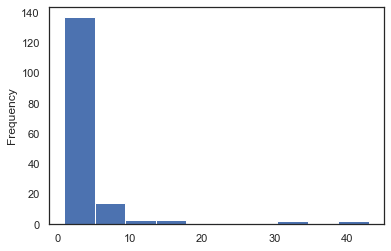

In [401]:
S_prices.value_counts().sort_index().plot(kind='hist')

<AxesSubplot:xlabel='Fare'>

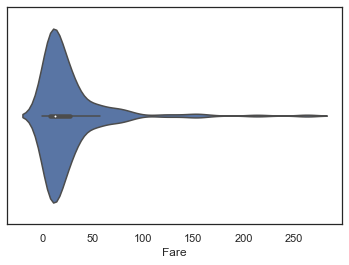

In [402]:
sns.set_theme(style="white")
sns.violinplot(x = S_prices)

In [403]:
C_embarkation_indexes = np.where(dataset['Embarked']=='C')[0]
C_prices = dataset['Fare'][C_embarkation_indexes]
mean_C_prices = np.round(np.mean(C_prices), 2)
mean_C_prices

59.95

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/3748633107.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_C_prices/x, '-', label = 'Mean prices of tickets from Cherbourg')


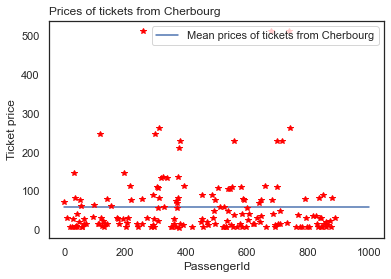

In [404]:
%matplotlib inline

plt.title("Prices of tickets from Cherbourg", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_C_prices/x, '-', label = 'Mean prices of tickets from Cherbourg')
plt.plot(C_embarkation_indexes, C_prices , '*', color = 'red')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

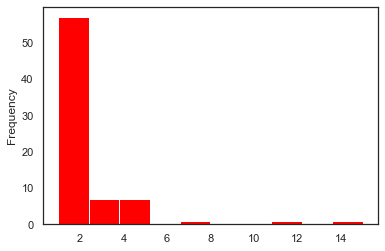

In [405]:
C_prices.value_counts().sort_index().plot(kind='hist', color = 'red')

<AxesSubplot:xlabel='Fare'>

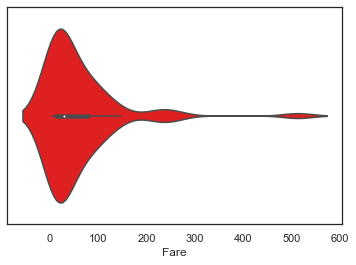

In [406]:
sns.set_theme(style="white" )
sns.violinplot(x = C_prices, color = 'red')

In [407]:
Q_embarkation_indexes = np.where(dataset['Embarked']=='Q')[0]
Q_prices = dataset['Fare'][Q_embarkation_indexes]
mean_Q_prices = np.round(np.mean(Q_prices), 2)
mean_Q_prices

13.28

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/1184288526.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_Q_prices/x, '-', label = 'Mean prices of tickets from Queenstown')


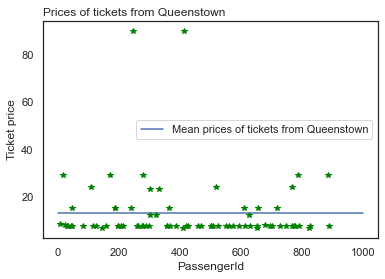

In [408]:
%matplotlib inline

plt.title("Prices of tickets from Queenstown", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_Q_prices/x, '-', label = 'Mean prices of tickets from Queenstown')
plt.plot(Q_embarkation_indexes, Q_prices , '*', color = 'green')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

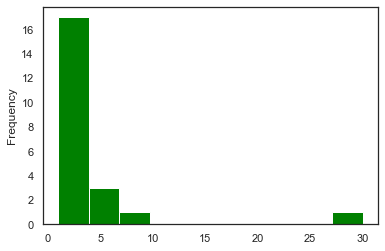

In [409]:
Q_prices.value_counts().sort_index().plot(kind='hist', color = 'green')

<AxesSubplot:xlabel='Fare'>

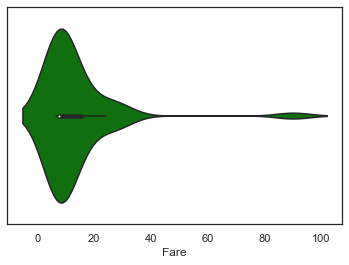

In [410]:
sns.set_theme(style="white" )
sns.violinplot(x = Q_prices, color = 'green')

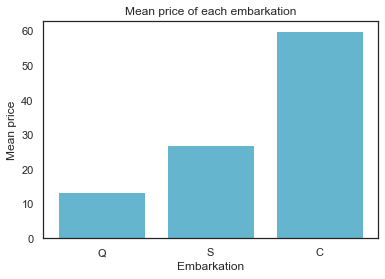

In [411]:
x = np.arange(3)
height = [mean_Q_prices, mean_S_prices, mean_C_prices]

plt.bar(x, height, align='center', color='c')

plt.title('Mean price of each embarkation')

plt.ylabel('Mean price')
plt.xlabel('Embarkation')
plt.xticks(x, ('Q','S','C'))

plt.show()

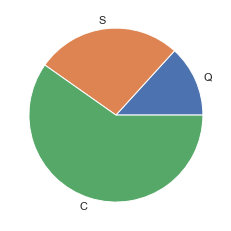

In [412]:
y = [mean_Q_prices, mean_S_prices, mean_C_prices]
mylabels = ['Q','S','C']

plt.pie(y, labels = mylabels)
plt.show() 

**Conclusions**</br>
To make sure if there is a correlation between the port of embarkation and the ticket price, we calculate the mean of each class of prices(C - Q - S), we get the mean price of C class = `59.95`, the mean price of Q class = `13.28` and the mean price of S class = `27.08`, we can note that minimum mean price for class Q then to S and then to C. That proves us that there is a correlation between the port of embarkation and the ticket price, where passengers who got on the titanic from Cherbourg, paid more then almost all others passengers (`about <= 150`), passengers from Southampton paid less then passengers from Cherbourg (`about <= 100`), while passengers from Queenstown paid lowest cost(`about <= 20`).

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

In [413]:
## You code here
values, counts = np.unique(dataset['Pclass'], return_counts=True) 
(values, counts)


(array([1, 2, 3], dtype=int64), array([216, 184, 491], dtype=int64))

In [414]:
pclass_1_indexes = np.where(dataset['Pclass']==1)[0]
pclass_1_prices = dataset['Fare'][pclass_1_indexes]
mean_pclass_1_prices = np.round(np.mean(pclass_1_prices), 2)
mean_pclass_1_prices

84.15

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/660340949.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_pclass_1_prices/x, '-', label = 'Prices of first(1) class tickets', color = 'black')


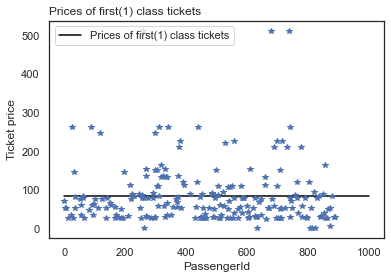

In [415]:
%matplotlib inline
x = np.linspace(0, 1000, 1000)

plt.title("Prices of first(1) class tickets", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_pclass_1_prices/x, '-', label = 'Prices of first(1) class tickets', color = 'black')
plt.plot(pclass_1_indexes, pclass_1_prices , '*')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

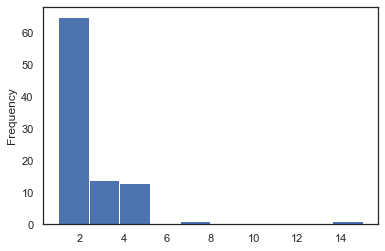

In [416]:
pclass_1_prices.value_counts().sort_index().plot(kind='hist')

<AxesSubplot:xlabel='Fare'>

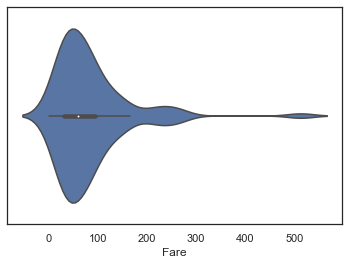

In [417]:
sns.set_theme(style="white")
sns.violinplot(x = pclass_1_prices)

In [418]:
pclass_2_indexes = np.where(dataset['Pclass']==2)[0]
pclass_2_prices = dataset['Fare'][pclass_2_indexes]
mean_pclass_2_prices = np.round(np.mean(pclass_2_prices), 2)
mean_pclass_2_prices

20.66

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/3915324338.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_pclass_2_prices/x, '-', label = 'Prices of second(2) class tickets')


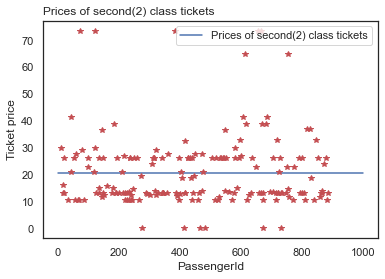

In [419]:
%matplotlib inline
x = np.linspace(0, 1000, 1000)

plt.title("Prices of second(2) class tickets", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_pclass_2_prices/x, '-', label = 'Prices of second(2) class tickets')
plt.plot(pclass_2_indexes, pclass_2_prices , '*', color = 'r')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

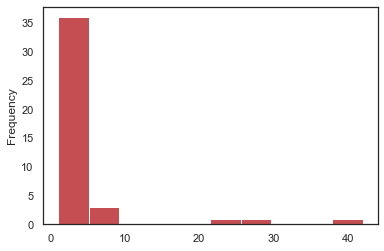

In [420]:
pclass_2_prices.value_counts().sort_index().plot(kind='hist', color='r')

<AxesSubplot:xlabel='Fare'>

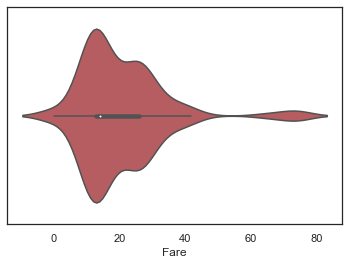

In [421]:
sns.set_theme(style="white")
sns.violinplot(x = pclass_2_prices, color='r')

In [422]:
pclass_3_indexes = np.where(dataset['Pclass']==3)[0]
pclass_3_prices = dataset['Fare'][pclass_3_indexes]
mean_pclass_3_prices = np.round(np.mean(pclass_3_prices), 2)
mean_pclass_3_prices

13.68

C:\Users\Yanal\AppData\Local\Temp/ipykernel_20692/935129263.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, x*mean_pclass_3_prices/x, '-', label = 'Prices of third(3) class tickets')


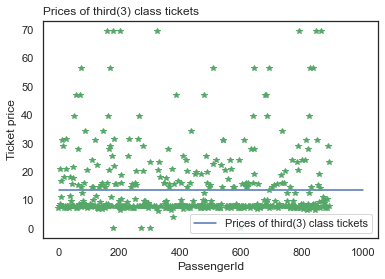

In [423]:
%matplotlib inline
x = np.linspace(0, 1000, 1000)

plt.title("Prices of third(3) class tickets", loc = 'left')
plt.xlabel("PassengerId")
plt.ylabel("Ticket price")
plt.plot(x, x*mean_pclass_3_prices/x, '-', label = 'Prices of third(3) class tickets')
plt.plot(pclass_3_indexes, pclass_3_prices , '*', color = 'g')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

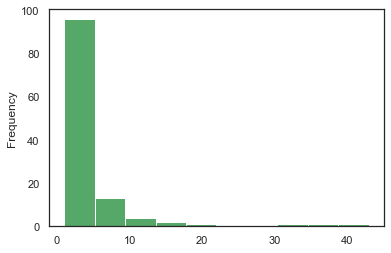

In [424]:
pclass_3_prices.value_counts().sort_index().plot(kind='hist', color='g')

<AxesSubplot:xlabel='Fare'>

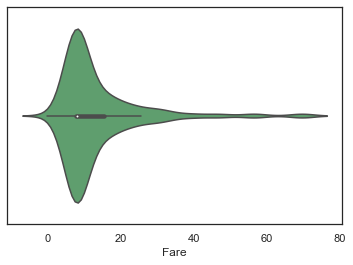

In [425]:
sns.set_theme(style="white")
sns.violinplot(x = pclass_3_prices, color='g')

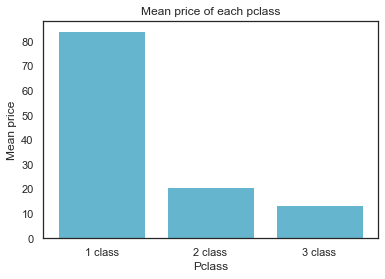

In [426]:
x = np.arange(3)
height = [mean_pclass_1_prices, mean_pclass_2_prices, mean_pclass_3_prices]

plt.bar(x, height, align='center', color='c')

plt.title('Mean price of each pclass')

plt.ylabel('Mean price')
plt.xlabel('Pclass')
plt.xticks(x, ('1 class','2 class','3 class'))

plt.show()

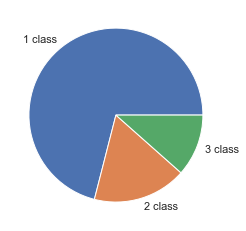

In [427]:
y = [mean_pclass_1_prices, mean_pclass_2_prices, mean_pclass_3_prices]
mylabels = ['1 class','2 class','3 class']

plt.pie(y, labels = mylabels)
plt.show() 

**Conclusions**</br>
To make sure if there is a correlation between pclass and ticket priсe, we calculate the mean of each class of prices(1 - 2 - 2), we get the mean price of `1` class = `84.15`, the mean price of `2` class = `20.66` and the mean price of `3` class = `13.68`, we can note that the `1` class has the max mean price, then the `2` class, then the `3` class . That proves us that there is a correlation between pclass and ticket priсe, where, `1` class passengers, paid more then almost all others passengers, `2` class passengers paid less then `1` class passengers, while `3` class passengers paid lowest cost.

About half of the passengers bought `3` class tickets(`<=30`)
`2` class passengers bought tickets at a cost of about `<= 30` 
`1` class passengers bought tickets at a cost of about `<= 170` 

---

<img src='https://media.makeameme.org/created/homework-is-coming.jpg'></img>

